In [30]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation, NMF
import matplotlib.pyplot as plt

In [2]:
file = pd.read_table('../steps/discrete.txt')

In [26]:
file.head()

,Sample,Chr,CN,SegSize,Dist2Cent,SegVal,LOH,SizeDipSeg,CpCN,Dist2nCNV,GCcSeg
0,TCGA-02-0001,1,3,6,4,5,0,2,3,6,4
1,TCGA-02-0001,2,3,5,5,6,0,1,10,1,3
2,TCGA-02-0001,3,2,5,5,5,0,1,4,3,2
3,TCGA-02-0001,4,2,6,3,2,0,4,2,2,1
4,TCGA-02-0001,5,2,5,6,3,0,3,13,2,2


In [27]:
file.shape

(23, 11)

In [45]:
X = file.drop(['Sample', 'Chr'], axis=1)
X.head()

,CN,SegSize,Dist2Cent,SegVal,LOH,SizeDipSeg,CpCN,Dist2nCNV,GCcSeg
0,3,6,4,5,0,2,3,6,4
1,3,5,5,6,0,1,10,1,3
2,2,5,5,5,0,1,4,3,2
3,2,6,3,2,0,4,2,2,1
4,2,5,6,3,0,3,13,2,2


In [69]:
def plot_top_words(model, n_components, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, int(round(n_components/2)), figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Signature {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [99]:
def lda_fit(df, n_components):
    # Removing columns with sample name and chromosome
    X = df.drop(['Sample', 'Chr'], axis = 1)
    
    # Fitting the model using the features
    model = LatentDirichletAllocation(
            n_components=n_components,
            max_iter=5,
            learning_method="online",
            learning_offset=50.0,
            random_state=0
            )

    fit = model.fit(X)
    
    return fit

def nmf_fit(df, n_components):
    # Removing columns with sample name and chromosome
    X = df.drop(['Sample', 'Chr'], axis = 1)
    
    # Fitting the model using the features
    model = NMF(
        n_components=n_components, 
        beta_loss="kullback-leibler",
        solver="mu",
        max_iter=1000,
        l1_ratio=0.5,
        random_state=0
        )
    
    fit = model.fit(X)
    
    return fit

In [100]:
n_samples = 23
n_features = 9
n_components = 8

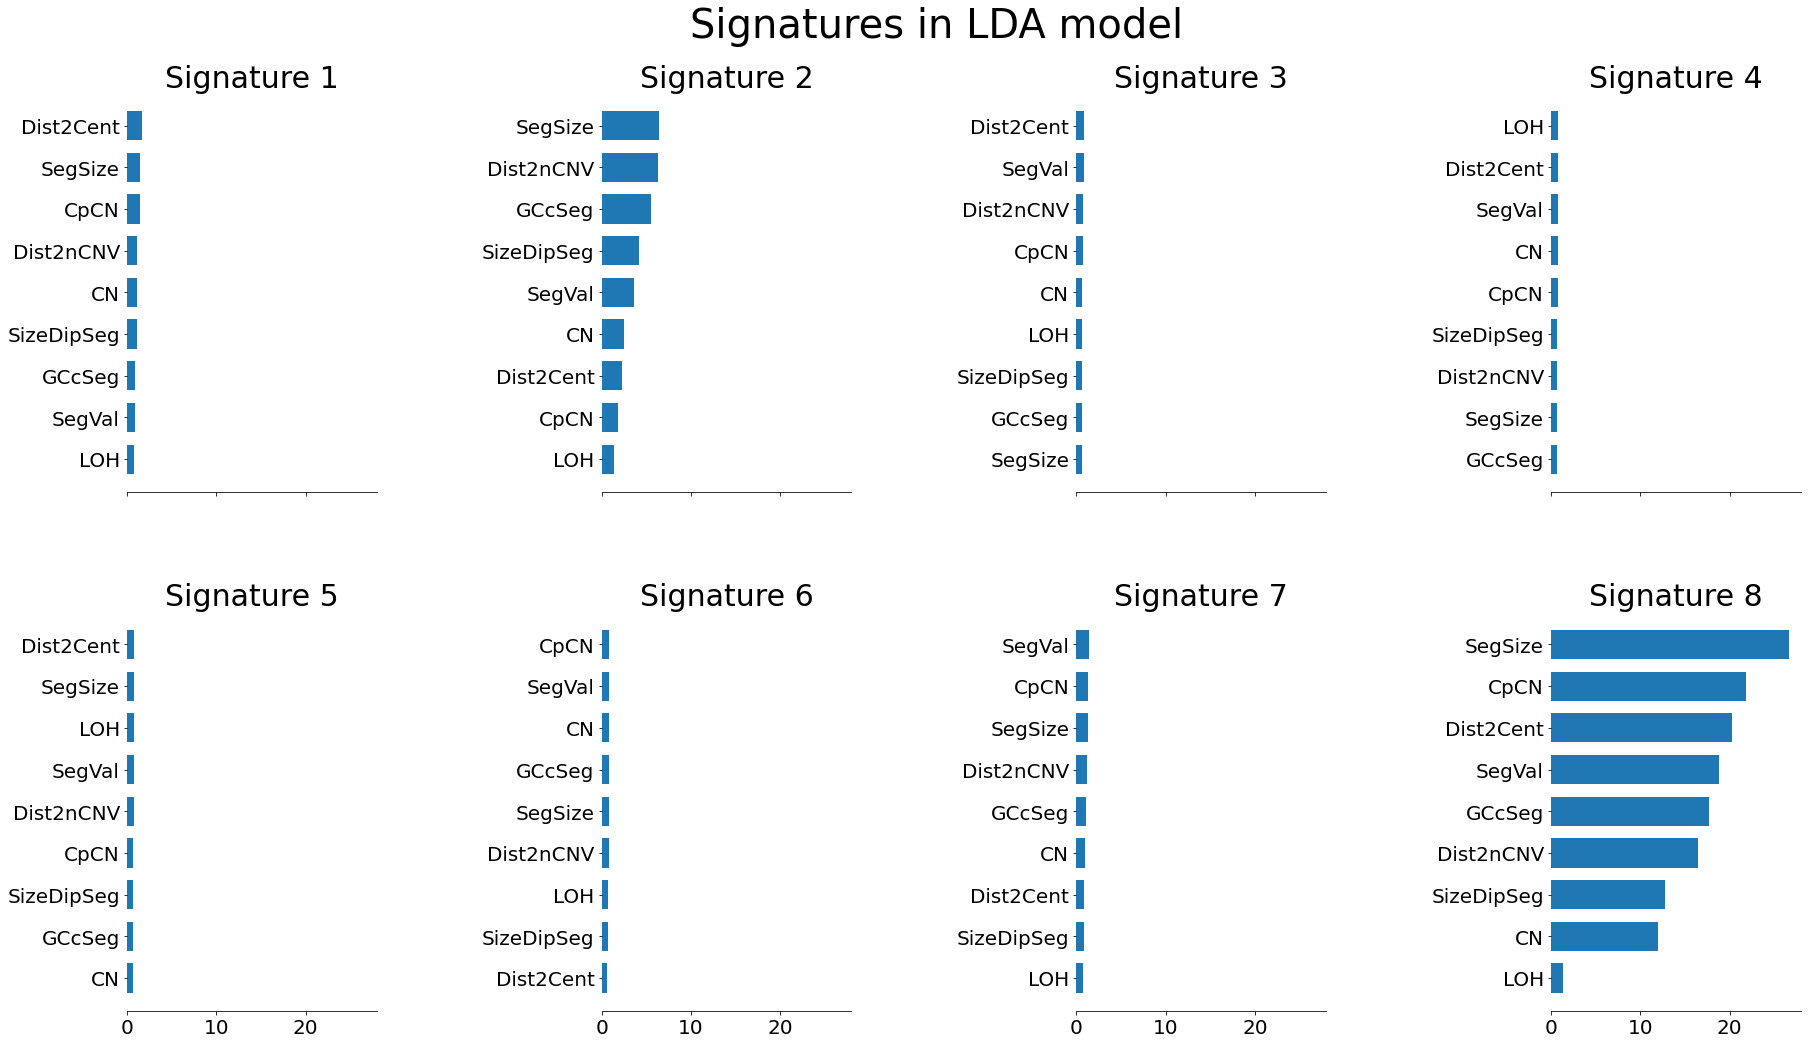

In [101]:
lda_fit = lda_fit(file, n_components)
plot_top_words(lda_fit, n_components, X.columns, n_features, "Signatures in LDA model")

/home/janneae/miniconda3/envs/cns/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


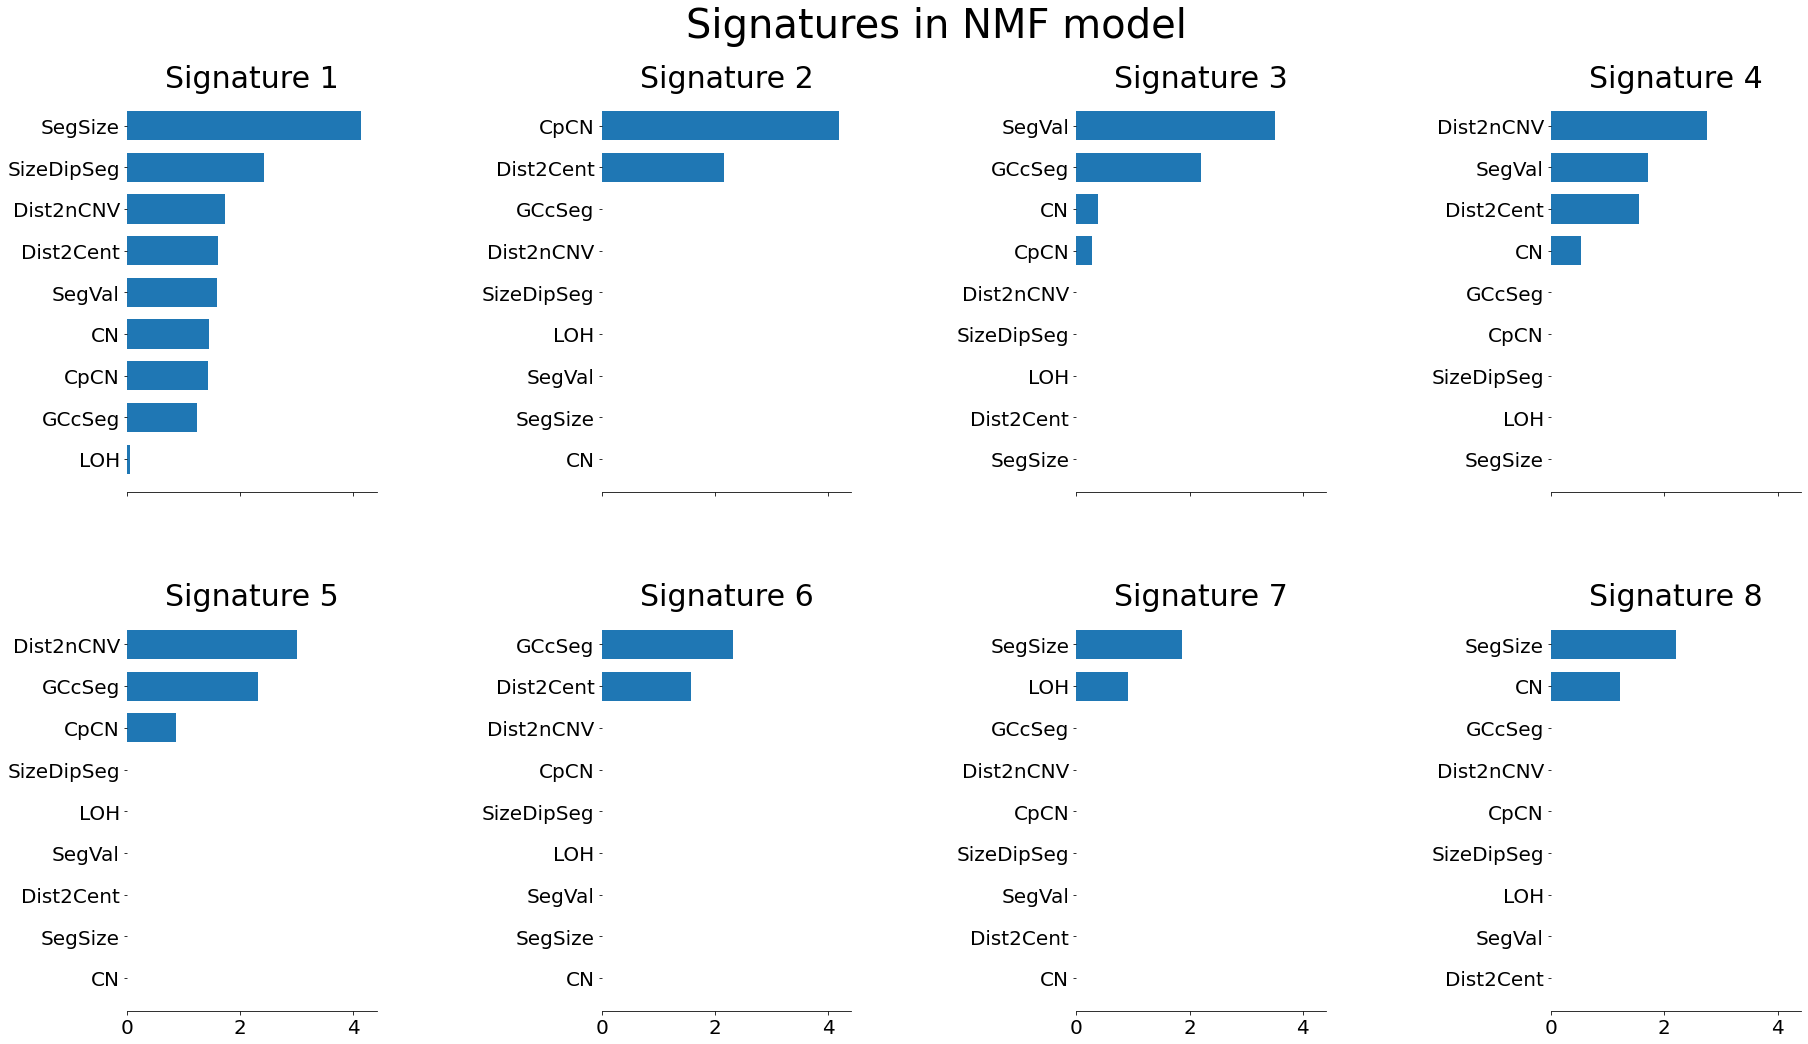

In [102]:
nmf_fit = nmf_fit(file, n_components)
plot_top_words(nmf_fit, n_components, X.columns, n_features, "Signatures in NMF model")